Ya begitu la ya, 

<h1>Mobility Data</h1>
from the following :
<li> https://www.google.com/covid19/mobility
<li> https://dataforgood.fb.com/docs/covid19
<h2>2020 ID Region Mobility Report by Google</h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [3]:
Mobility_ID = pd.read_csv('/content/drive/MyDrive/Data Science Study/Projects/2020_ID_Region_Mobility_Report.csv')
Mobility_ID.sample(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
10127,ID,Indonesia,West Nusa Tenggara,NaN,NaN,ID-NB,NaN,ChIJIe0SGpQNuC0RxXX30MzCZ2k,2020-08-09,-15.0,-2.0,-6.0,-48.0,2,8
3581,ID,Indonesia,East Nusa Tenggara,NaN,NaN,ID-NT,NaN,ChIJlzbpqE3yUiwR4Br3yvsLAwE,2020-04-05,-36.0,-20.0,-19.0,-38.0,-7,8
4549,ID,Indonesia,Jambi,NaN,NaN,ID-JA,NaN,ChIJ2aytzd2IJS4R8E-Q0103c3Q,2020-04-10,-34.0,-20.0,-29.0,-48.0,-51,16
1863,ID,Indonesia,Bengkulu,NaN,NaN,ID-BE,NaN,ChIJeZLjNx6wNi4R4bGjxGX7HFE,2020-10-30,-4.0,7.0,15.0,-28.0,-48,5
9778,ID,Indonesia,West Kalimantan,NaN,NaN,ID-KB,NaN,ChIJu_7rjBcYBS4RoEghTO3sXM0,2020-07-12,-28.0,-14.0,-21.0,-36.0,-2,8


In [4]:
Mobility_ID.shape

(11235, 15)

In [5]:
Mobility_ID.isnull().sum()

country_region_code                                       0
country_region                                            0
sub_region_1                                            321
sub_region_2                                          11235
metro_area                                            11235
iso_3166_2_code                                         321
census_fips_code                                      11235
place_id                                                  0
date                                                      0
retail_and_recreation_percent_change_from_baseline       50
grocery_and_pharmacy_percent_change_from_baseline        99
parks_percent_change_from_baseline                      118
transit_stations_percent_change_from_baseline           391
workplaces_percent_change_from_baseline                   0
residential_percent_change_from_baseline                  0
dtype: int64

In [6]:
# removing null coloumns
Mobility_ID.drop(labels=['sub_region_2','metro_area','census_fips_code'],axis=1, inplace=True)
Mobility_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 11235 non-null  object 
 1   country_region                                      11235 non-null  object 
 2   sub_region_1                                        10914 non-null  object 
 3   iso_3166_2_code                                     10914 non-null  object 
 4   place_id                                            11235 non-null  object 
 5   date                                                11235 non-null  object 
 6   retail_and_recreation_percent_change_from_baseline  11185 non-null  float64
 7   grocery_and_pharmacy_percent_change_from_baseline   11136 non-null  float64
 8   parks_percent_change_from_baseline                  11117 non-null  float64


In [7]:
# drop unecessary data
Mobility_ID.drop(labels=['country_region','country_region_code','place_id','iso_3166_2_code'], axis = 1, inplace=True)
Mobility_ID.shape

(11235, 8)

In [8]:
Mobility_ID.rename(columns={'sub_region_1':'province',
                            'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
                            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                            'parks_percent_change_from_baseline':'parks',
                            'transit_stations_percent_change_from_baseline':'transit_stations',
                            'workplaces_percent_change_from_baseline':'workplaces',
                            'residential_percent_change_from_baseline':'residental'},inplace=True)

In [9]:
Mobility_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   province               10914 non-null  object 
 1   date                   11235 non-null  object 
 2   retail_and_recreation  11185 non-null  float64
 3   grocery_and_pharmacy   11136 non-null  float64
 4   parks                  11117 non-null  float64
 5   transit_stations       10844 non-null  float64
 6   workplaces             11235 non-null  int64  
 7   residental             11235 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 702.3+ KB


In [10]:
Mobility_ID.describe()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residental
count,11185.000000,11136.000000,11117.000000,10844.000000,11235.000000,11235.00000
mean,-17.864193,-3.340876,-13.457857,-33.490686,-18.755496,8.48073
std,14.183591,13.504384,19.937717,20.081918,14.505030,5.69989
min,-89.000000,-92.000000,-96.000000,-95.000000,-89.000000,-9.00000
25%,-27.000000,-12.000000,-24.000000,-48.000000,-26.000000,5.00000
50%,-16.000000,-2.000000,-11.000000,-34.000000,-20.000000,9.00000
75%,-8.000000,5.000000,-1.000000,-21.000000,-11.000000,12.00000
max,25.000000,74.000000,99.000000,55.000000,24.000000,37.00000


retail_recreation_percent_change_from baseline

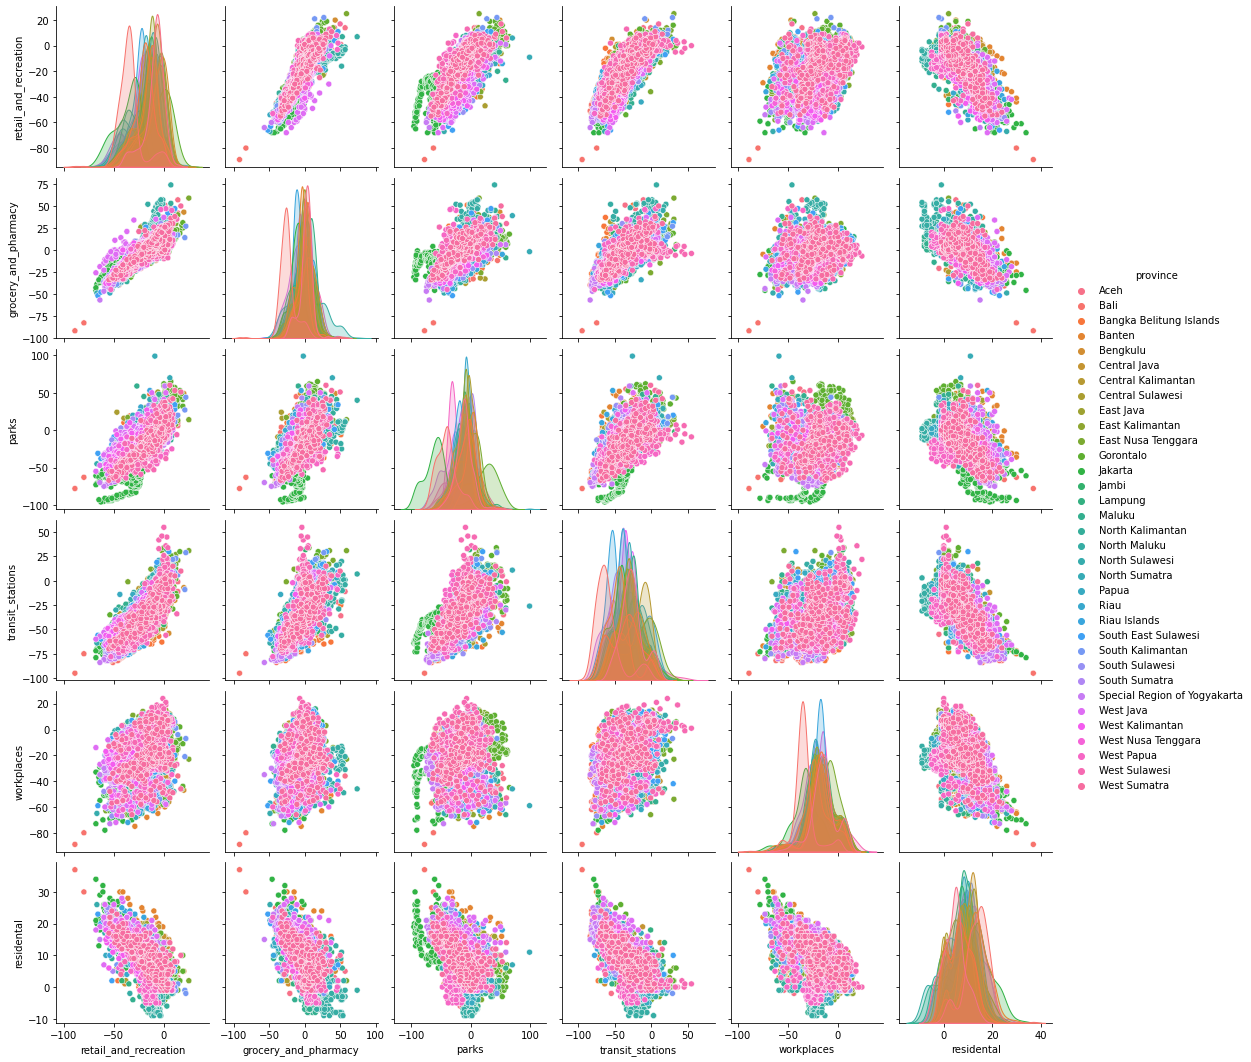

In [11]:
sns.pairplot(Mobility_ID, hue='province')
plt.show()

In [12]:
Mobility_ID.to_excel('/content/drive/MyDrive/Data Science Study/Projects/Mobility_2020_Google.xlsx', index=True, header=True)

<h2>Mobility by Facebook</h2>

In [13]:
movement_range = pd.read_csv('/content/drive/MyDrive/Data Science Study/Projects/movement-range-2021-08-21.txt', delimiter='\t')
movement_range.sample(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
1672619,2021-04-21,JPN,GADM,JPN.41.22_1,Katsushika,-0.06455,0.12396,full_february,DAY_OF_WEEK
2549718,2021-02-28,THA,GADM,THA.17.25_1,Waeng Yai,0.25617,0.21712,full_february,DAY_OF_WEEK
2791489,2021-03-11,TUR,GADM,TUR.74_1,Tokat,-0.01123,0.18532,full_february,DAY_OF_WEEK
5490,2021-01-02,ALB,GADM,ALB.8_1,Kukës,0.09950,0.14929,full_february,DAY_OF_WEEK
172440,2021-02-01,AUS,GADM,AUS.9.7_1,Clarence,-0.06600,0.15728,full_february,DAY_OF_WEEK


In [14]:
movement_range.isnull().sum() , movement_range.shape

(ds                                                 0
 country                                            0
 polygon_source                                     0
 polygon_id                                         0
 polygon_name                                  152977
 all_day_bing_tiles_visited_relative_change         0
 all_day_ratio_single_tile_users                    0
 baseline_name                                      0
 baseline_type                                      0
 dtype: int64, (3506275, 9))

In [15]:
# get Indonesian data only
movement_range_ID = movement_range[movement_range['country'] == 'IDN'] 

In [16]:
movement_range_ID.head()

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
1277437,2021-01-01,IDN,GADM,IDN.1.10_1,Aceh Timur,-0.00045,0.25399,full_february,DAY_OF_WEEK
1277438,2021-01-02,IDN,GADM,IDN.1.10_1,Aceh Timur,-0.05155,0.24741,full_february,DAY_OF_WEEK
1277439,2021-01-03,IDN,GADM,IDN.1.10_1,Aceh Timur,-0.10062,0.28182,full_february,DAY_OF_WEEK
1277440,2021-01-04,IDN,GADM,IDN.1.10_1,Aceh Timur,0.02546,0.20491,full_february,DAY_OF_WEEK
1277441,2021-01-05,IDN,GADM,IDN.1.10_1,Aceh Timur,-0.01233,0.21060,full_february,DAY_OF_WEEK


In [17]:
movement_range_ID.shape, movement_range_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111447 entries, 1277437 to 1388883
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ds                                          111447 non-null  object 
 1   country                                     111447 non-null  object 
 2   polygon_source                              111447 non-null  object 
 3   polygon_id                                  111447 non-null  object 
 4   polygon_name                                111447 non-null  object 
 5   all_day_bing_tiles_visited_relative_change  111447 non-null  float64
 6   all_day_ratio_single_tile_users             111447 non-null  float64
 7   baseline_name                               111447 non-null  object 
 8   baseline_type                               111447 non-null  object 
dtypes: float64(2), object(7)
memory usage: 8.5+ MB


((111447, 9), None)

In [18]:
# drop uneccesary data
movement_range_ID.drop(labels=['country','polygon_source','polygon_id','baseline_name','baseline_type'], axis = 1 , inplace=True)
movement_range_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111447 entries, 1277437 to 1388883
Data columns (total 4 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ds                                          111447 non-null  object 
 1   polygon_name                                111447 non-null  object 
 2   all_day_bing_tiles_visited_relative_change  111447 non-null  float64
 3   all_day_ratio_single_tile_users             111447 non-null  float64
dtypes: float64(2), object(2)
memory usage: 4.3+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
movement_range_ID.rename(columns={'ds':'tanggal',
                                   'polygon_name':'Kabupaten'}, inplace=True)
movement_range_ID.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111447 entries, 1277437 to 1388883
Data columns (total 4 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   tanggal                                     111447 non-null  object 
 1   Kabupaten                                   111447 non-null  object 
 2   all_day_bing_tiles_visited_relative_change  111447 non-null  float64
 3   all_day_ratio_single_tile_users             111447 non-null  float64
dtypes: float64(2), object(2)
memory usage: 4.3+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
movement_range_ID_indexdrop = movement_range_ID['all_day_bing_tiles_visited_relative_change'].reset_index(drop=True)

In [21]:
movement_range_ID_indexdrop

0        -0.00045
1        -0.05155
2        -0.10062
3         0.02546
4        -0.01233
           ...   
111442   -0.23808
111443   -0.16362
111444   -0.14736
111445   -0.15994
111446   -0.16044
Name: all_day_bing_tiles_visited_relative_change, Length: 111447, dtype: float64

In [22]:
# save to excel 
movement_range_ID.to_excel("/content/drive/MyDrive/Data Science Study/Projects/movement_range_ID_preprocessed.xlsx", 
                           index = True, header = True)